In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets("fashion_mnist/", one_hot=True)

# Python optimisation variables
learning_rate = 0.0001
epochs = 10
batch_size = 50

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784 - this is the flattened image data that is drawn from 
# fashion_mnist.train.nextbatch()
x = tf.placeholder(tf.float32, [None, 784])
# dynamically reshape the input
x_shaped = tf.reshape(x, [-1, 28, 28, 1])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion_mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion_mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting fashion_mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting fashion_mnist/t10k-labels-idx1-ubyte.gz
In

## READ the Dataset

In [15]:
import pandas as pd
# loading training and test datasets
test= pd.read_csv("fashion_mnist/fashion-mnist_test.csv")
train = pd.read_csv("fashion_mnist/fashion-mnist_train.csv")

# create training and test labels
fashion_train_samples = train.iloc[:,1:]
fashion_train_labels = train.iloc[:,0]

fashion_test_samples = test.iloc[:,1:]
fashion_test_labels = test.iloc[:,0]

In [5]:
print("Shape of train dataset", fashion_mnist.train.images.shape)
print("Shape of test dataset", fashion_mnist.test.images.shape)
print("Shape of validation dataset", fashion_mnist.validation.images.shape)
print("Shape of validation dataset", fashion_mnist.validation.images.shape)
print("Shape of train labels", fashion_mnist.train.labels.shape)
print("Shape of test labels", fashion_mnist.test.labels.shape)

Shape of train dataset (55000, 784)
Shape of test dataset (10000, 784)
Shape of validation dataset (5000, 784)
Shape of validation dataset (5000, 784)
Shape of train labels (55000, 10)
Shape of test labels (10000, 10)


C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


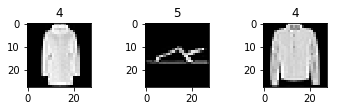

In [16]:
# sample_img = fashionMNIST.train.images[5].reshape(28, 28)
sample_img=fashion_train_samples.iloc[6,:].reshape(28,28)
plt.subplot(330+7)
plt.imshow(sample_img, cmap=plt.get_cmap('gray'))
plt.title(fashion_train_labels[6])
# plt.show()
sample_img=fashion_train_samples.iloc[7,:].reshape(28,28)
plt.subplot(330+7+1)
plt.imshow(sample_img, cmap=plt.get_cmap('gray'))
plt.title(fashion_train_labels[7])
sample_img=fashion_train_samples.iloc[8,:].reshape(28,28)
plt.subplot(330+8+1)
plt.imshow(sample_img, cmap=plt.get_cmap('gray'))
plt.title(fashion_train_labels[8])
plt.show()

In [10]:
import matplotlib.pyplot as plt

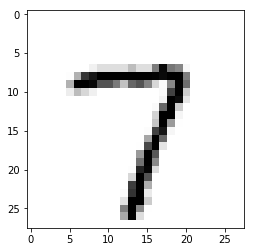

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
sample_img = fashion_mnist.train.images[100].reshape(28, 28)
plt.imshow(sample_img).set_cmap('Greys')
plt.show()
print(sample_img)

In [2]:
def create_new_conv_layer(input_data, num_input_channels, num_filters, filter_shape, pool_shape, name):
    # setup the filter input shape for tf.nn.conv_2d
    conv_filt_shape = [filter_shape[0], filter_shape[1], num_input_channels,
                      num_filters]

    # initialise weights and bias for the filter
    weights = tf.Variable(tf.truncated_normal(conv_filt_shape, stddev=0.03),
                                      name=name+'_W')
    bias = tf.Variable(tf.truncated_normal([num_filters]), name=name+'_b')

    # setup the convolutional layer operation
    out_layer = tf.nn.conv2d(input_data, weights, [1, 1, 1, 1], padding='SAME')

    # add the bias
    out_layer += bias

    # apply a ReLU non-linear activation
    out_layer = tf.nn.relu(out_layer)

    # now perform max pooling
    ksize = [1, pool_shape[0], pool_shape[1], 1]
    strides = [1, 2, 2, 1]
    out_layer = tf.nn.max_pool(out_layer, ksize=ksize, strides=strides, 
                               padding='SAME')

    return out_layer

## VISUALIZE THE DATASET

In [3]:
# create some convolutional layers
layer1 = create_new_conv_layer(x_shaped, 1, 32, [5, 5], [2, 2], name='layer1')
layer2 = create_new_conv_layer(layer1, 32, 64, [5, 5], [2, 2], name='layer2')

In [4]:
flattened = tf.reshape(layer2, [-1, 7 * 7 * 64])

In [5]:
# setup some weights and bias values for this layer, then activate with ReLU
wd1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1000], stddev=0.03), name='wd1')
bd1 = tf.Variable(tf.truncated_normal([1000], stddev=0.01), name='bd1')
dense_layer1 = tf.matmul(flattened, wd1) + bd1
dense_layer1 = tf.nn.relu(dense_layer1)

## Check if dataset is correctly read by matching images and labels

In [7]:
# another layer with softmax activations
wd2 = tf.Variable(tf.truncated_normal([1000, 10], stddev=0.03), name='wd2')
bd2 = tf.Variable(tf.truncated_normal([10], stddev=0.01), name='bd2')
dense_layer2 = tf.matmul(dense_layer1, wd2) + bd2
y_ = tf.nn.softmax(dense_layer2)

## Preprocess Dataset
Convert to 2D arrays

Standardize dataset

One-hot encoding of image labels

In [9]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=dense_layer2, labels=y))


# CNN

In [11]:
# add an optimiser
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# setup the initialisation operator
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    total_batch = int(len(fashion_mnist.train.labels) / batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = fashion_mnist.train.next_batch(batch_size=batch_size)
            _, c = sess.run([optimiser, cross_entropy], 
                            feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        test_acc = sess.run(accuracy, 
                       feed_dict={x: fashion_mnist.test.images, y: fashion_mnist.test.labels})
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost), "test accuracy: {:.3f}".format(test_acc))

    print("\nTraining complete!")
    print(sess.run(accuracy, feed_dict={x: fashion_mnist.test.images, y: fashion_mnist.test.labels}))

Epoch: 1 cost = 0.705 test accuracy: 0.942
Epoch: 2 cost = 0.153 test accuracy: 0.969
Epoch: 3 cost = 0.095 test accuracy: 0.978
Epoch: 4 cost = 0.070 test accuracy: 0.980
Epoch: 5 cost = 0.055 test accuracy: 0.987
Epoch: 6 cost = 0.046 test accuracy: 0.987
Epoch: 7 cost = 0.039 test accuracy: 0.989
Epoch: 8 cost = 0.033 test accuracy: 0.988
Epoch: 9 cost = 0.028 test accuracy: 0.988
Epoch: 10 cost = 0.024 test accuracy: 0.988

Training complete!
0.9875


## LINKS
http://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-tensorflow/

http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/